# Data Cleaning:

In [1]:
import pandas as pd

In [4]:
# Load the dataset into a DataFrame.
df = pd.read_csv("startup_funding.csv")

In [6]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2080 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


#

#### 1. Dropping Columns

In [12]:
# Get values from the 'Remark' column
df["Remarks"].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Remarks, dtype: object

In [14]:
# Dropping the 'Remark' column as it contains NaN values
df = df.drop(columns = ["Remarks"])

In [16]:
# Dropping the 'Subvertica' column as it contains a high rate of missing values
df = df.drop(columns = ["SubVertical"])

In [18]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


#

#### 2. Cleaning "Amount in USD" Column

In [22]:
# Replace ","
df["Amount in USD"] = df["Amount in USD"].replace(",", "", regex = True)

In [24]:
# Converting into numeric
df["Amount in USD"] = pd.to_numeric(df["Amount in USD"], errors = "coerce")

In [26]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,13/01/2020,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


#

#### 3. Handling Null or Missing Values

In [30]:
# Display null values
df.isnull().sum()

Sr No                  0
Date dd/mm/yyyy        0
Startup Name           0
Industry Vertical    171
City  Location       180
Investors Name        24
InvestmentnType        4
Amount in USD        972
dtype: int64

In [32]:
# fill missing values with the 0 in "Amount in USD"
df["Amount in USD"] = df["Amount in USD"].fillna(0)

In [34]:
# Droping null values
df = df.dropna()

In [36]:
# checking null value
df.isnull().sum()

Sr No                0
Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
dtype: int64

In [38]:
df.shape

(2836, 8)

#

#### 4. Cleaning "City Location" Column

In [42]:
# Analyze the column by looking at the unique values
unique_cities = df["City  Location"].value_counts().reset_index()
unique_cities.head(60)

,City Location,count
0,Bangalore,700
1,Mumbai,557
2,New Delhi,424
3,Gurgaon,289
4,Bengaluru,136
5,Pune,105
6,Hyderabad,98
7,Chennai,97
8,Noida,93
9,Gurugram,50


In [44]:
# Analyze the column by looking at the unique values 
unique_cities.tail(52)

,City Location,count
52,New Delhi/ Houston,1
53,Bangalore / USA,1
54,Gurgaon / SFO,1
55,US/India,1
56,New York/ India,1
57,Bangalore / San Mateo,1
58,Chennai/ Singapore,1
59,Jodhpur,1
60,Belgaum,1
61,Noida / Singapore,1


In [46]:
# Rename the column by reassigning the returned DataFrame to df1
df = df.rename(columns={"City  Location": "City Location"})

In [48]:
# If the cell contains multiple tokens (e.g. separated by "/" or ","), keep only the first token.
df["City Location"] = df["City Location"].apply(lambda x: x.split('/')[0].split(',')[0].strip() if x else x)

In [50]:
# Convert to lowercase for standardization (for easier matching)
df["City Location"] = df["City Location"].str.lower()

In [52]:
# Create a correction dictionary for common variants and misspellings
corrections = {
    "bengaluru": "bangalore",            
    "gurugram": "gurgaon",         
    "ahemadabad": "ahmedabad",      
    "ahemdabad": "ahmedabad",       
    "nw delhi": "new delhi",        
    "new delhi": "new delhi",
    "mumbai": "mumbai",
    "hyderabad": "hyderabad",
    "chennai": "chennai",
    "noida": "noida",
    "kolkatta": "kolkata",         
    "kolkata": "kolkata",
    "bhubneswar": "bhubaneswar",    
    "bhubaneswar": "bhubaneswar",
    "kormangala": "koramangala",
}

In [54]:
# Apply the corrections using the replace method
df["City Location"] = df["City Location"].replace(corrections)

In [56]:
# Finally, convert the corrected names to proper (title) case
df["City Location"] = df["City Location"].str.title()

In [58]:
# Display the first 10 rows to verify that the City Location column has been cleaned correctly
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,Bangalore,Tiger Global Management,Private Equity Round,200000000.0
1,2,13/01/2020,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Bangalore,Sequoia Capital India,Series B,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


#

#### 5. Splitting "Investor Name" Column

In [62]:
# First, split the investor names on commas
df['Investors Name'] = df['Investors Name'].str.split(',')

In [64]:
# Remove extra words like 'and' and trim spaces
df = df.explode('Investors Name')
df['Investors Name'] = df['Investors Name'].str.replace(r'\band\b', '', regex=True).str.strip()

In [66]:
df.shape

(5450, 8)

#

#### 6. Handling Duplicates

In [70]:
# Checking duplicates
df.duplicated().sum()

1

In [72]:
# Dropping Duplicates
df = df.drop_duplicates()

#

#### 7. Reset Index

In [76]:
# Reset Index to remove gaps and NaN values
df.reset_index(drop=True, inplace=True)

In [78]:
# Reassign Sr. No properly
df['Sr No'] = range(1, len(df) + 1)

#

#### 8. Downloading clean dataset

In [16]:
# Downloading clean dataset
# df.to_csv("cleaned_startup_funding.csv", index = False)

#

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [54]:
warnings.filterwarnings("ignore")

# Key Insights & Visualization:

In [57]:
df1 = pd.read_csv("cleaned_startup_funding.csv")

In [59]:
df1.head(10)

,Sr_No,Date,Startup_Name,Industry_Vertical,City,Investors_Name,InvestmentnType,Amount_in_USD
0,1,09/01/2020,BYJU’S,E-Tech,Bangalore,Tiger Global Management,Private Equity Round,200000000.0
1,2,13/01/2020,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Bangalore,Sequoia Capital India,Series B,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
5,6,13/01/2020,Pando,Logistics,Chennai,Chiratae Ventures,Series A,9000000.0
6,7,10/01/2020,Zomato,Hospitality,Gurgaon,Ant Financial,Private Equity Round,150000000.0
7,8,12/12/2019,Ecozen,Technology,Pune,Sathguru Catalyzer Advisors,Series A,6000000.0
8,9,06/12/2019,CarDekho,E-Commerce,Gurgaon,Ping An Global Voyager Fund,Series D,70000000.0
9,10,03/12/2019,Dhruva Space,Aerospace,Bangalore,Mumbai Angels,Seed,50000000.0


In [61]:
df1.isnull().sum()

Sr_No                0
Date                 0
Startup_Name         0
Industry_Vertical    0
City                 0
Investors_Name       0
InvestmentnType      0
Amount_in_USD        0
dtype: int64

In [63]:
df1.duplicated().sum()

0

In [65]:
df1.dtypes

Sr_No                  int64
Date                  object
Startup_Name          object
Industry_Vertical     object
City                  object
Investors_Name        object
InvestmentnType       object
Amount_in_USD        float64
dtype: object

In [67]:
# This ensures proper date handling for further time-based analysis.
df1["Date"] = pd.to_datetime(df1["Date"], format = "%d/%m/%Y", errors = "coerce")	

In [69]:
df1.head()

,Sr_No,Date,Startup_Name,Industry_Vertical,City,Investors_Name,InvestmentnType,Amount_in_USD
0,1,2020-01-09,BYJU’S,E-Tech,Bangalore,Tiger Global Management,Private Equity Round,200000000.0
1,2,2020-01-13,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-01-09,Mamaearth,E-commerce,Bangalore,Sequoia Capital India,Series B,18358860.0
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-01-02,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


#

## 1. Summary Analysis

#### 1. Year‐Over‐Year Total Funding Trend

In [74]:
# Extract the year from the date
df1["Year"] = df1["Date"].dt.year
df1.head()

,Sr_No,Date,Startup_Name,Industry_Vertical,City,Investors_Name,InvestmentnType,Amount_in_USD,Year
0,1,2020-01-09,BYJU’S,E-Tech,Bangalore,Tiger Global Management,Private Equity Round,200000000.0,2020.0
1,2,2020-01-13,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,2020.0
2,3,2020-01-09,Mamaearth,E-commerce,Bangalore,Sequoia Capital India,Series B,18358860.0,2020.0
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020.0
4,5,2020-01-02,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020.0


In [76]:
# Total Funding per Year
yearly_funding = df1.groupby("Year")["Amount_in_USD"].sum().reset_index()
yearly_funding

,Year,Amount_in_USD
0,2015.0,2.004538e+10
1,2016.0,8.664870e+09
2,2017.0,1.896892e+10
3,2018.0,8.350972e+09
4,2019.0,1.331379e+10
5,2020.0,3.902073e+08


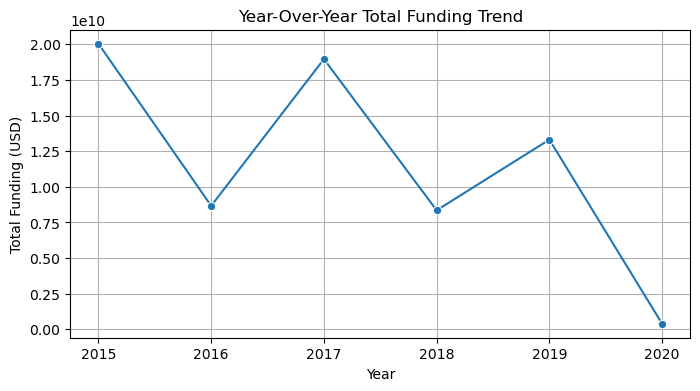

In [78]:
# Plot the trend
plt.figure(figsize=(8, 4))
sns.lineplot(data=yearly_funding, x="Year", y="Amount_in_USD", marker="o")
plt.title('Year-Over-Year Total Funding Trend')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.show()

#

## 2. Startup Analysis

#### 1. Top 10 Cities by Total Funding

In [83]:
# Total funding by city
city_funding = df1.groupby("City")["Amount_in_USD"].sum().reset_index().sort_values("Amount_in_USD", ascending=False).head(10)
city_funding

,City,Amount_in_USD
4,Bangalore,3.433660e+10
42,Mumbai,9.055361e+09
21,Gurgaon,8.518292e+09
44,New Delhi,7.115047e+09
49,Pune,1.566502e+09
14,Chennai,1.477659e+09
46,Noida,1.435434e+09
26,India,1.263000e+09
36,Koramangala,8.520000e+08
25,Hyderabad,5.779505e+08


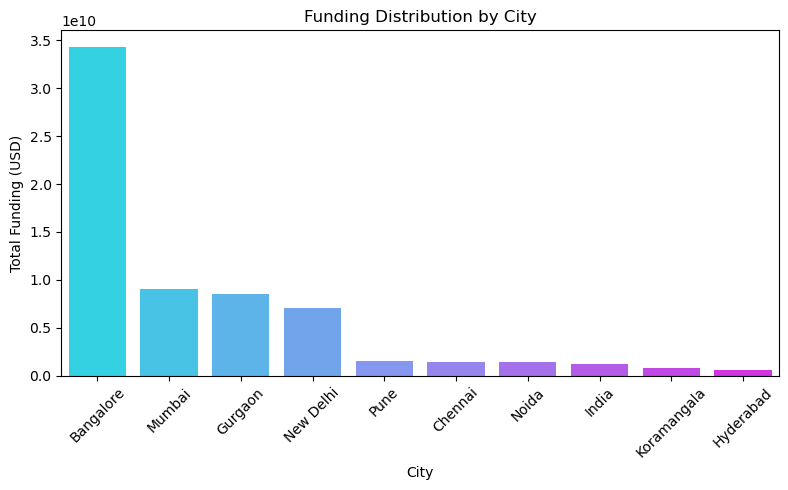

In [85]:
# Plot Top 10 Cities by Amount
plt.figure(figsize=(8, 5))
sns.barplot(data=city_funding, x='City', y='Amount_in_USD', palette='cool')
plt.xlabel('City')
plt.ylabel('Total Funding (USD)')
plt.title('Funding Distribution by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2. Top 10 Industry/Sector by Total Funding

In [89]:
# Total Funding by Industry
funding_by_sector = df1.groupby('Industry_Vertical')['Amount_in_USD'].sum().reset_index().sort_values("Amount_in_USD", ascending=False).head(10)
funding_by_sector

,Industry_Vertical,Amount_in_USD
112,Consumer Internet,1.448560e+10
775,eCommerce,8.953159e+09
722,Technology,4.659351e+09
726,Transportation,3.916632e+09
85,Car Aggregator & Retail Mobile App,3.000000e+09
175,ECommerce,2.328313e+09
238,Finance,2.276928e+09
79,Cab Aggregator,1.600000e+09
188,Ecommerce Marketplace,1.500000e+09
171,E-Commerce & M-Commerce platform,1.360000e+09


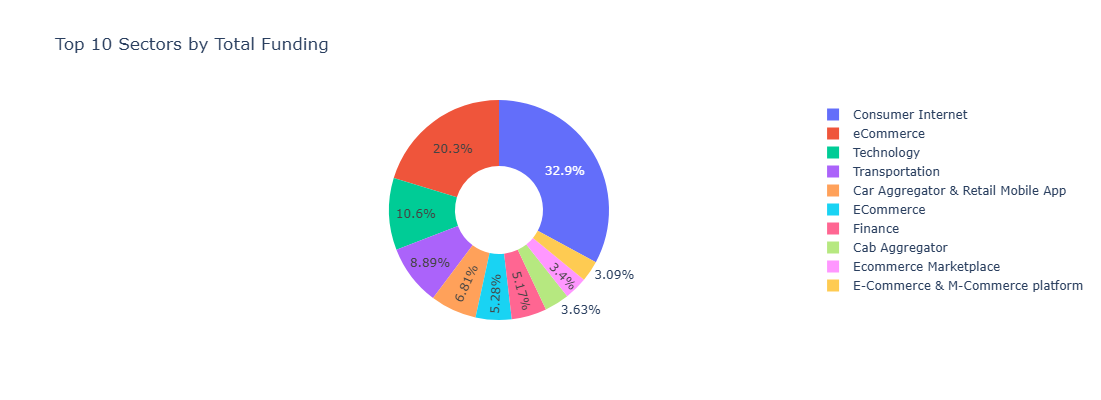

In [91]:
# Create a pie chart using Plotly Express
fig = px.pie(
    funding_by_sector,
    values='Amount_in_USD',
    names='Industry_Vertical',
    title='Top 10 Sectors by Total Funding',
    hole=0.4  # Optional: Set hole size for a donut chart effect
)

fig.update_layout(width=800, height=400)

# Show the figure
fig.show()

#### 3. Top 10 Startups by Total Funding

In [95]:
startup_funding = df1.groupby("Startup_Name")['Amount_in_USD'].sum().reset_index().sort_values("Amount_in_USD", ascending=False).head(10)
startup_funding

,Startup_Name,Amount_in_USD
646,Flipkart,6.898400e+09
1555,Rapido Bike Taxi,3.900000e+09
1419,Paytm,3.828950e+09
1361,Ola,3.589000e+09
1762,Snapdeal,1.700000e+09
1364,Olacabs,1.600000e+09
1993,Udaan,1.465000e+09
1362,Ola Cabs,1.456700e+09
188,BigBasket,1.407000e+09
1350,OYO Rooms,1.260000e+09


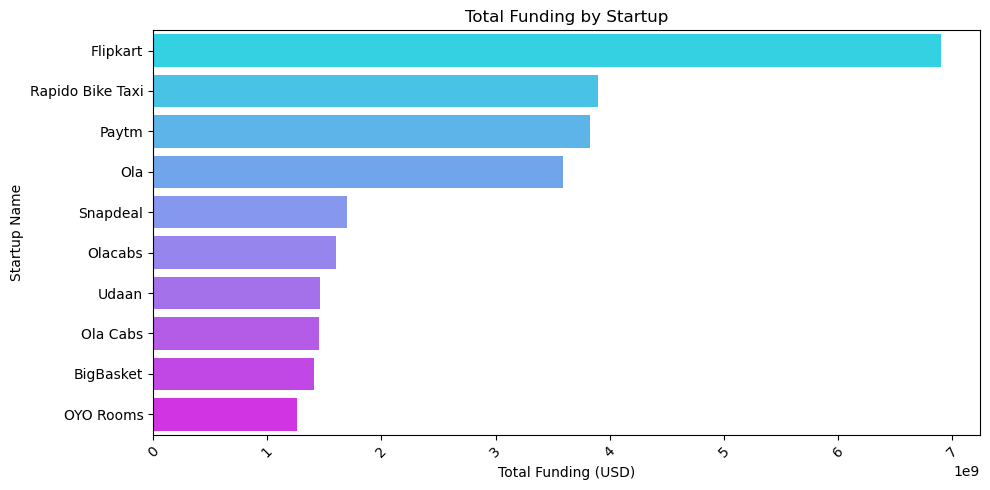

In [97]:
# Plot Funding Distribution
plt.figure(figsize=(10, 5))
sns.barplot(data=startup_funding, x='Amount_in_USD', y='Startup_Name', palette='cool')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Startup Name')
plt.title('Total Funding by Startup')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4. Percentage of Startups with Multiple Funding Rounds

In [101]:
# Count the number of rounds per startup
rounds = df1.groupby('Startup_Name').size().reset_index(name='Round Count')

# Classify each startup based on funding rounds
rounds['Round Type'] = rounds['Round Count'].apply(lambda x: 'Multiple Rounds' if x > 1 else 'Single Round')

# Count the startups in each category
round_type_counts = rounds['Round Type'].value_counts().reset_index()
round_type_counts


,Round Type,count
0,Single Round,1192
1,Multiple Rounds,1116


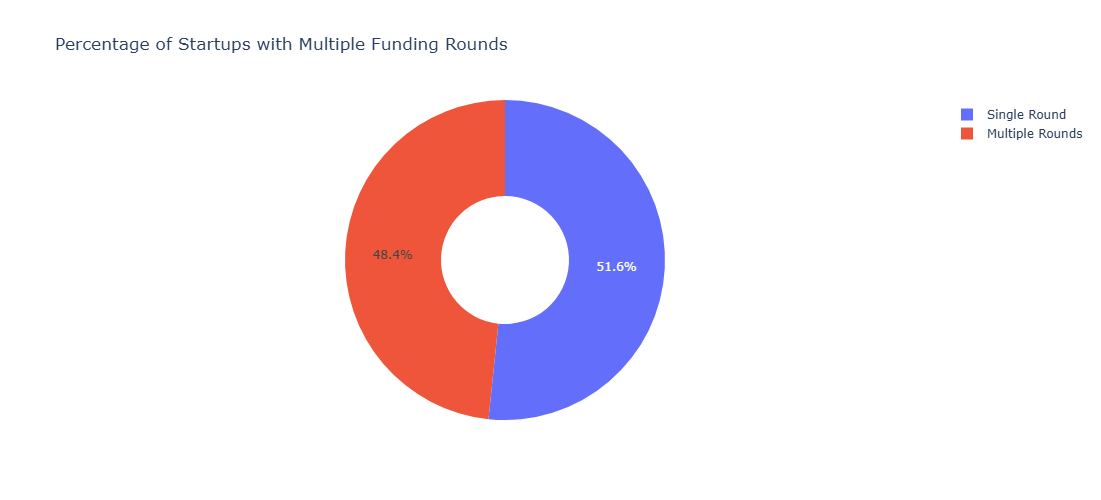

In [103]:
# Create a pie chart using Plotly Express
fig = px.pie(
    round_type_counts, 
    values='count', 
    names='Round Type', 
    title='Percentage of Startups with Multiple Funding Rounds', 
    hole=0.4  # Creates a donut chart effect
)

# Optionally increase the chart size
fig.update_layout(width=500, height=500)

# Show the chart
fig.show()

#

## 3. INVESTOR ANALYSIS

#### 1. Top Investor by Number of Deals

In [108]:
# Group by 'Investors Name' and count the deals
deals_by_investor = df1.groupby('Investors_Name').size().reset_index(name='Deal Count').sort_values(by='Deal Count', ascending=False).head(10)
deals_by_investor

,Investors_Name,Deal Count
78,Accel Partners,67
2426,Sequoia Capital,62
1309,Kalaari Capital,45
509,Blume Ventures,45
2269,SAIF Partners,44
1163,Indian Angel Network,42
2800,Undisclosed Investors,36
2806,Undisclosed investors,31
2144,Ratan Tata,29
1758,Nexus Venture Partners,27


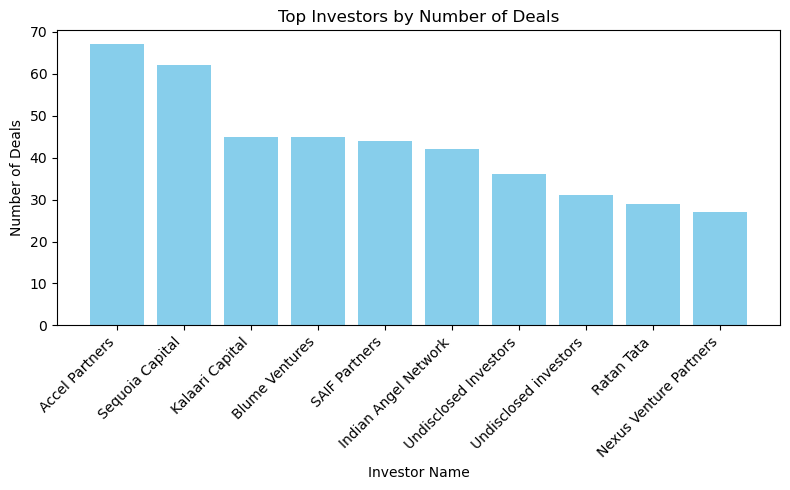

In [110]:
# Plot the top 10 investors by Number of Deals
plt.figure(figsize=(8, 5))
plt.bar(deals_by_investor['Investors_Name'], deals_by_investor['Deal Count'], color='skyblue')
plt.xlabel('Investor Name')
plt.ylabel('Number of Deals')
plt.title('Top Investors by Number of Deals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2. Top Investor by Total Funding Deployed

In [114]:
# Top Investor by Total Funding 
funding_by_investor = df1.groupby('Investors_Name')['Amount_in_USD'].sum().reset_index().sort_values("Amount_in_USD", ascending=False).head(10)
funding_by_investor

,Investors_Name,Amount_in_USD
2996,Westbridge Capital,3.900000e+09
2536,Softbank,3.545000e+09
2531,SoftBank Group,2.487000e+09
2732,Tiger Global,1.962250e+09
2711,Tencent Holdings,1.610000e+09
657,DST Global,1.492000e+09
2426,Sequoia Capital,1.463880e+09
3072,eBay,1.400000e+09
1613,Microsoft,1.400000e+09
2909,Vijay Shekhar Sharma,1.005400e+09


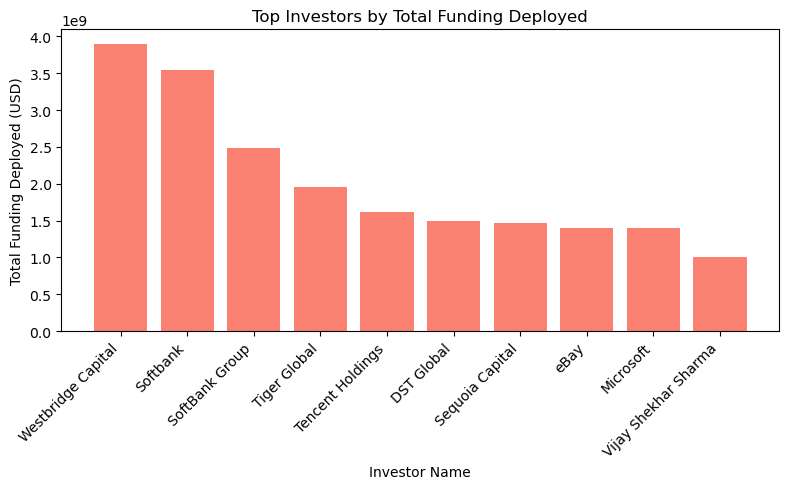

In [116]:
# Plot the top 10 investors by total funding deployed
plt.figure(figsize=(8, 5))
plt.bar(funding_by_investor['Investors_Name'], funding_by_investor['Amount_in_USD'], color='salmon')
plt.xlabel('Investor Name')
plt.ylabel('Total Funding Deployed (USD)')
plt.title('Top Investors by Total Funding Deployed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
